# ENVRI HUB library usage
In this notebook we'll showcase the intended usage of the *VRE-Lib* component developed by WP 13 and WP 14.
The VRE-Lib is available as a *Python package* on the [public package index](https://pypi.org/project/envrihub/) un the *envrihub* name.
This means it can be installed with:

In [1]:
! pip install --upgrade envrihub


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


As long as you don't have anything dodgy in mind (we'll cover that later in this notebook), you'll need to import only one thing from the package: the *Hub* object.

In [2]:
from envrihub import Hub

hub = Hub()

That is the only thing you need to search, retrieve, and access resources listed on the Envri-Hub catalogue.
# Searh for resources in the catalogue
Let's begin from the search task, although we recommend doing it throught the [COS Web UI](	https://catalogue.staging.envri.eu/), you can script it too with the Hub's `search_catalogue` method.
Let's demonstrate it's usage.
## Free text search
The most basic type of search you can perform is a *free text* one, much like you would do in any search engine.

In [3]:
for res in hub.search_catalogue('beacon'):
    print(res.title)
    print(f'\t resource id: {res.uid}')
    print(f'\t resource type: {res.type}')
    print(f'\t resurce description: {res.description}\n\n')

SeaDataNet - Beacon
	 resource id: file:///software/notebook/1107/Dataset/001/seadatanet77/Distribution/001
	 resource type: DOWNLOADABLE_FILE
	 resurce description: This is a notebook for querying the Beacon SeaDataNet CDI instance (datalake subsetting API)




The `search_catalogue` method always return a *Generator* object, i.e. somthing you can iterate on, so you can process search results one by one as they get fetched from the catalogue.

Each result has the shape of a `Distribution` object, containing anything you need to work with that resource, including the data access logic. We'll see that in the detail later, for now it's enough to know that all of them have an `id` that is unique in the Catalogue and there are two types of them: *Web Services*, and *Downloadable Files*.
## Spatial coverage search
We can query the catalogue also by specifying a region of interest. Such a region can be expressed as a WKT string, a format used by most GIS applications, so you can copy-paste spatial information from your GIS of choice and shove it straight into the `search_catalogue` function.

In [4]:
geography = 'POLYGON((10.70 48.34,28.98 48.34, 28.98 36.17, 10.70 36.17, 10.70 48.34))'

for res in hub.search_catalogue(geography = geography):
    print(res.title)
    print(f'\t resource id: {res.uid}')
    print(f'\t resource type: {res.type}')
    print(f'\t resurce description: {res.description}\n\n')

Seadatanet - visualization services (Erddap)
	 resource id: https://www.epos-eu.org/epos-dcat-ap/Dataset/aefb2173-b17b-4955-9c15-6ea175038e45
	 resource type: WEB_SERVICE
	 resurce description: Browsing the product catalogue allows users to search for one or more available products as well as the related data collections. Users can also retrieve the full set of metadata, originators and distributors. The catalogue is integrated with the Map viewer, is compliant with ISO19139 metadata standards and fulfils INSPIRE Directive requirements.


AphiaIDsByAttributeKeyID
	 resource id: https://doi.org/10.14284/wormswebservice_distIdByAttrKeyId
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, wh

AphiaRecordsByMatchNames
	 resource id: https://doi.org/10.14284/wormswebservice_distRecbyMatchNames
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in WoRMS are provided via its website (https://www.marinespecies.org/). The data system behind WoRMS is called Aphia. All the names in WoRMS are tagged with an unique and persistent ID: the AphiaID. Using the WoRMS RESTful services, one can obtain the information held in Aphia using the AphiaID as key, or using the names, external identifiers, classification and trait keywords, etc. The servic

LifeWatch ERIC Metadata Catalogue Web Service
	 resource id: https://metadatacatalogue.lifewatch.eu/doc/api
	 resource type: WEB_SERVICE
	 resurce description: Web Service endpoint to query the LifeWatch ERIC Metadata Catalogue


AphiaAttributesByAphiaID
	 resource id: https://doi.org/10.14284/wormswebservice_distAttrByAphiaId
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in WoRMS are provided via its website (https://www.marinespecies.org/). The data system behind WoRMS is called Aphia. All the names in WoRMS are tagged with an unique a

ERROR:root:Resource https://cdi.seadatanet.org/report/982949-Distribution/xml documentation at None cannot be used to create a data access client
ERROR:root:You must provide either a URL to read, or a spec string to parse, but not both!


Argo - EXV33 - BBP700 - GeoJSON
	 resource id: file:///ArgoBGC_distribution_006
	 resource type: WEB_SERVICE
	 resurce description: Distribution of Argo BGC data (EXV33 - BBP700) via ERDDAP web service.




ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap/Distribution/07d07705-4991-4842-8dc4-4bb4c8ac52a9 documentation at None cannot be used to create a data access client
ERROR:root:You must provide either a URL to read, or a spec string to parse, but not both!


CDI Dataset #982949 metadata in RDF format
	 resource id: https://cdi.seadatanet.org/report/982949-Distribution/sparql
	 resource type: WEB_SERVICE
	 resurce description: RDF representation of the metadata for the dataset with identifier #982949.




Argo - EXV33 - CHLA - GeoJSON
	 resource id: file:///ArgoBGC_distribution_005
	 resource type: WEB_SERVICE
	 resurce description: Distribution of Argo data (EXV33 - CHLA) via ERDDAP web service.




ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap/Distribution/abad1ed3-f48c-46eb-97c8-ad9179cb5857 documentation at https://www.icare.univ-lille.fr/asd-content/colocation/api/ cannot be used to create a data access client
ERROR:root:mapping values are not allowed in this context
  in "<unicode string>", line 22, column 10


EPOS - DEM in radar geometry
	 resource id: https://catalog.terradue.com/gep-epos/SatelliteObservations/Dataset/DEM_Radar_Geometry/Distribution/DEM_radar
	 resource type: WEB_SERVICE
	 resurce description: Digital Elevation Model provided in radar coordinates.<br><br>This service is adopted from the EPOS Platform (https://www.ics-c.epos-eu.org) and provided to the ENVRI Hub by EPOS ERIC.


AphiaExternalIDByAphiaID
	 resource id: https://doi.org/10.14284/wormswebservice_distAExtIdByAphiaId
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in 

ERROR:root:Resource https://prod-actris-md.nilu.no/Distribution/5e91c124-ac29-4be3-a700-1fc44bb636b4 documentation at https://prod-actris-md.nilu.no/swagger/v1/swagger.json cannot be used to create a data access client
ERROR:root:Cannot fetch URL "https://prod-actris-md.nilu.no/swagger/v1/swagger.json": 404 Not Found
ERROR:root:Resource file:///SIOSOFEndpoint documentation at None cannot be used to create a data access client
ERROR:root:You must provide either a URL to read, or a spec string to parse, but not both!


Argo - EXV33 - IRRADIANCE - GeoJSON
	 resource id: file:///ArgoBGC_distribution_007
	 resource type: WEB_SERVICE
	 resurce description: Subset of Argo Float profiles for variable EXV33 - IRRADIANCE, extracted via ERDDAP.


EPOS Data Access
	 resource id: file:///software/notebook/1107/Dataset/001/epos44/Distribution/001
	 resource type: DOWNLOADABLE_FILE
	 resurce description: EPOS Data Access




ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap-Distribution/01cb9246-60f3-4a17-b518-2f5f52fc619b documentation at https://github.com/ICOS-Carbon-Portal/meta#readme cannot be used to create a data access client
ERROR:root:mapping values are not allowed in this context
  in "<unicode string>", line 35, column 28


AphiaRecordByAphiaID
	 resource id: https://doi.org/10.14284/wormswebservice_distRecByAphiaId
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in WoRMS are provided via its website (https://www.marinespecies.org/). The data system behind WoRMS is called Aphia. All the names in WoRMS are tagged with an unique and persistent ID: the AphiaID. Using the WoRMS RESTful services, one can obtain the information held in Aphia using the AphiaID as key, or using the names, external identifiers, classification and trait keywords, etc. The service Aphia

ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap/Distribution/65dcd0ec-09dd-44c1-a672-34699d5544a3 documentation at https://github.com/iagos-dc/envri-fair-atmospheric-demonstrator cannot be used to create a data access client
ERROR:root:mapping values are not allowed in this context
  in "<unicode string>", line 35, column 28


Access EXV related ACTRIS (meta)data
	 resource id: file:///software/notebook/1107/Dataset/001/actris33/Distribution/001
	 resource type: DOWNLOADABLE_FILE
	 resurce description: Access EXV related ACTRIS (meta)data


EPOS - Station metadata distributed by the ORFEUS Data Center at KNMI
	 resource id: https://www.epos-eu.org/epos-dcat-ap/Seismology/Dataset/002/Distribution/002/ODC
	 resource type: WEB_SERVICE
	 resurce description: Access to seismic station metadata (XML and GEOJSON formats) distributed by the ORFEUS Data Center at KNMI.<br><br>This service is adopted from the EPOS Platform (https://www.ics-c.epos-eu.org) and provided to the ENVRI Hub by EPOS ERIC.


AphiaRecordByExternalID
	 resource id: https://doi.org/10.14284/wormswebservice_distRecByExtId
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS conta

AphiaRecordsByNames
	 resource id: https://doi.org/10.14284/wormswebservice_distRecByNames
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in WoRMS are provided via its website (https://www.marinespecies.org/). The data system behind WoRMS is called Aphia. All the names in WoRMS are tagged with an unique and persistent ID: the AphiaID. Using the WoRMS RESTful services, one can obtain the information held in Aphia using the AphiaID as key, or using the names, external identifiers, classification and trait keywords, etc. The service AphiaRec

ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap/Distribution/f58d9e00-bd3b-4254-96a9-577913931640 documentation at None cannot be used to create a data access client
ERROR:root:You must provide either a URL to read, or a spec string to parse, but not both!
ERROR:root:Resource https://cdi.seadatanet.org/report/982949-Distribution/data documentation at None cannot be used to create a data access client
ERROR:root:You must provide either a URL to read, or a spec string to parse, but not both!
ERROR:root:Resource file:///SIOSCSWEndpoint documentation at None cannot be used to create a data access client
ERROR:root:You must provide either a URL to read, or a spec string to parse, but not both!


Argo SPARQL Endpoint
	 resource id: https://www.epos-eu.org/epos-dcat-ap/Distribution/358180a0-7cf9-46f5-9492-f678b750cee2
	 resource type: WEB_SERVICE
	 resurce description: Argo SPARQL Endpoint containing floats metadata such as vertical profiles, sensors, deployment and provenance.


EPOS - LOS Displacement Time Series
	 resource id: https://catalog.terradue.com/gep-epos/SatelliteObservations/Dataset/LOS_Displacement_Time_Series/Distribution/LOS_Displ_TS
	 resource type: WEB_SERVICE
	 resurce description: Temporal evoluton of the surface displacement projected along the satellite Line of Sight (LOS).<br><br>This service is adopted from the EPOS Platform (https://www.ics-c.epos-eu.org) and provided to the ENVRI Hub by EPOS ERIC.


EISCAT Madrigal
	 resource id: https://www.epos-eu.org/epos-dcat-ap-Distribution/f50a7d51-9f0e-4478-8ce5-343189400f1d
	 resource type: WEB_SERVICE
	 resurce description: Collection of data in EISCAT Madrigal Database


AphiaRecordsByDate
	 resource id: http

ERROR:root:Resource https://cdi.seadatanet.org/report/982949-Distribution/html documentation at None cannot be used to create a data access client
ERROR:root:You must provide either a URL to read, or a spec string to parse, but not both!


ACTRIS REST API - List of Metadata serving Clouds ECV 
	 resource id: file:///actris-dataset-distribution-clouds
	 resource type: WEB_SERVICE
	 resurce description: Information on the composition and variability and of the physical, optical and chemical properties of short-lived atmospheric constituents, from the surface throughout the troposphere to the stratosphere, with the required level of precision, coherence, and integration


AphiaDistributionsByAphiaID
	 resource id: https://doi.org/10.14284/wormswebservice_distDistByAphiaId
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a n

ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap/Dataset/5ffd8aab-a348-4144-9871-f0b33f953ec2 documentation at None cannot be used to create a data access client
ERROR:root:You must provide either a URL to read, or a spec string to parse, but not both!
ERROR:root:Resource https://prod-actris-md.nilu.no/Distribution/76e598f2-3890-4794-ab7d-c9754ded35c8 documentation at https://prod-actris-md.nilu.no/swagger/v1/swagger.json cannot be used to create a data access client
ERROR:root:Cannot fetch URL "https://prod-actris-md.nilu.no/swagger/v1/swagger.json": 404 Not Found


AphiaRecordsByName
	 resource id: https://doi.org/10.14284/wormswebservice_distRecByName
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in WoRMS are provided via its website (https://www.marinespecies.org/). The data system behind WoRMS is called Aphia. All the names in WoRMS are tagged with an unique and persistent ID: the AphiaID. Using the WoRMS RESTful services, one can obtain the information held in Aphia using the AphiaID as key, or using the names, external identifiers, classification and trait keywords, etc. The service AphiaRecor

ERROR:root:Resource https://prod-actris-md.nilu.no/Distribution/9ae872d5-3c42-4f01-83c5-ec7a883eb638 documentation at https://prod-actris-md.nilu.no/swagger/v1/swagger.json cannot be used to create a data access client
ERROR:root:Cannot fetch URL "https://prod-actris-md.nilu.no/swagger/v1/swagger.json": 404 Not Found


Argo - EXV17/EXV18 - surface ocean temperature and sub-surface ocean temperature
	 resource id: file:///ArgoFloats_distribution_003
	 resource type: WEB_SERVICE
	 resurce description: Argo Float - EXV17/EXV18 - surface ocean temperature and sub-surface ocean temperature




ERROR:root:Resource https://cdi.seadatanet.org/report/982949-Distribution/json documentation at None cannot be used to create a data access client
ERROR:root:You must provide either a URL to read, or a spec string to parse, but not both!


AphiaRecordsByTaxonRankID
	 resource id: https://doi.org/10.14284/wormswebservice_distRecByTaxRankId
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in WoRMS are provided via its website (https://www.marinespecies.org/). The data system behind WoRMS is called Aphia. All the names in WoRMS are tagged with an unique and persistent ID: the AphiaID. Using the WoRMS RESTful services, one can obtain the information held in Aphia using the AphiaID as key, or using the names, external identifiers, classification and trait keywords, etc. The servic

ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap-Distribution/9d7d8f43-83af-4935-92d4-ccd77d7052d6 documentation at https://github.com/ICOS-Carbon-Portal/data#readme cannot be used to create a data access client
ERROR:root:mapping values are not allowed in this context
  in "<unicode string>", line 35, column 28
ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap-Distribution/f3de596c-4850-42d3-ade9-2168c79d6207 documentation at https://github.com/ICOS-Carbon-Portal/infrastructure/tree/master/stilt#readme.https://github.com/ICOS-Carbon-Portal/stiltweb#readme cannot be used to create a data access client
ERROR:root:mapping values are not allowed in this context
  in "<unicode string>", line 35, column 28


AphiaIDByName
	 resource id: https://doi.org/10.14284/wormswebservice_distIdByName
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in WoRMS are provided via its website (https://www.marinespecies.org/). The data system behind WoRMS is called Aphia. All the names in WoRMS are tagged with an unique and persistent ID: the AphiaID. Using the WoRMS RESTful services, one can obtain the information held in Aphia using the AphiaID as key, or using the names, external identifiers, classification and trait keywords, etc. The service AphiaIDByName is

ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap-Distribution/b576b34e-41e5-4714-8a86-d367abb3e3b0 documentation at https://github.com/ICOS-Carbon-Portal/data#readme cannot be used to create a data access client
ERROR:root:mapping values are not allowed in this context
  in "<unicode string>", line 35, column 28


EPOS - Waveform quality and availability metrics distributed by the ORFEUS Data Center at KNMI
	 resource id: https://www.epos-eu.org/epos-dcat-ap/Seismology/Dataset/003/Distribution/003/ODC
	 resource type: WEB_SERVICE
	 resurce description: Access to waveform quality and availability metrics (JSON format) distributed by the ORFEUS Data Center at KNMI.<br><br>This service is adopted from the EPOS Platform (https://www.ics-c.epos-eu.org) and provided to the ENVRI Hub by EPOS ERIC.


AphiaClassificationByAphiaID
	 resource id: https://doi.org/10.14284/wormswebservice_distClassByAphiaId
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information

Argo - EXV28 - DOXY
	 resource id: file:///ArgoBGC_distribution_004
	 resource type: WEB_SERVICE
	 resurce description: Subset of Argo Float profiles for variable EXV28 - DOXY, extracted via ERDDAP.




ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap-Distribution/dfeb48ff-2843-40e9-a040-6cec1881402d documentation at https://github.com/ICOS-Carbon-Portal/infrastructure/tree/master/stilt#readme.https://github.com/ICOS-Carbon-Portal/stiltweb#readme cannot be used to create a data access client
ERROR:root:mapping values are not allowed in this context
  in "<unicode string>", line 35, column 28


AphiaChildrenByAphiaID
	 resource id: https://doi.org/10.14284/wormswebservice_distChildByAphiaId
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in WoRMS are provided via its website (https://www.marinespecies.org/). The data system behind WoRMS is called Aphia. All the names in WoRMS are tagged with an unique and persistent ID: the AphiaID. Using the WoRMS RESTful services, one can obtain the information held in Aphia using the AphiaID as key, or using the names, external identifiers, classification and trait keywords, etc. The service A

Argo - EXV19/EXV20 - surface ocean salinity and sub-surface ocean salinity - GeoJSON
	 resource id: file:///ArgoFloats_distribution_002
	 resource type: WEB_SERVICE
	 resurce description: Distribution of Argo float salinity data filtered for good data only and exported as GeoJSON, using Ifremer ERDDAP web service.




ERROR:root:Resource https://api.anaee.eu/crea-aa-dailymeteo/getRasterData documentation at None cannot be used to create a data access client
ERROR:root:You must provide either a URL to read, or a spec string to parse, but not both!


EPOS - Seismic waveforms distributed by the ORFEUS Data Center at KNMI
	 resource id: https://www.epos-eu.org/epos-dcat-ap/Seismology/Dataset/001/Distribution/001/ODC
	 resource type: WEB_SERVICE
	 resurce description: Access to seismic waveforms (miniSEED format) distributed by the ORFEUS Data Center at KNMI.<br><br>This service is adopted from the EPOS Platform (https://www.ics-c.epos-eu.org) and provided to the ENVRI Hub by EPOS ERIC.




ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap-Distribution/3f36ac72-fcd9-4cf8-880d-46d224cc1caf documentation at https://jupyterhub.readthedocs.io/en/stable/.https://github.com/ICOS-Carbon-Portal/infrastructure/tree/master/devops/roles/icos.jupyter#readme.https://github.com/ICOS-Carbon-Portal/jupyter#readme cannot be used to create a data access client
ERROR:root:Cannot fetch URL "https://jupyterhub.readthedocs.io/en/stable/.https://github.com/ICOS-Carbon-Portal/infrastructure/tree/master/devops/roles/icos.jupyter#readme.https://github.com/ICOS-Carbon-Portal/jupyter#readme": 404 Not Found
ERROR:root:Resource https://fdpdemo.envri.eu//Distribution documentation at https://docs.fairdatapoint.org/en/latest/index.html cannot be used to create a data access client
ERROR:root:'str' object has no attribute 'copy'
ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap/Distribution/3f409a1f-0665-4cb5-aa2b-c3004ab682a5 documentation at https://iagos.aeris-data.fr/download-instructio

ICOS Data Access
	 resource id: file:///software/notebook/1107/Dataset/001/icos66/Distribution/001
	 resource type: DOWNLOADABLE_FILE
	 resurce description: ICOS Data Access


Seadatanet - Sextant SPARQL Endpoint
	 resource id: https://www.epos-eu.org/epos-dcat-ap/Distribution/358180a0-7cf9-46f5-9492-f678b750cee1
	 resource type: WEB_SERVICE
	 resurce description: Contains metadata about Sextant-Seadtanet catalogue products, such as their DCAT description, download link and CDI used.


AphiaRecordsByVernacular
	 resource id: https://doi.org/10.14284/wormswebservice_distRecByVernacular
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information

ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap/Distribution/ec06fd17-1def-4e27-8c86-4a86b0d2f8c4 documentation at https://services.iagos-data.fr/prod/swagger-ui/index.html cannot be used to create a data access client
ERROR:root:mapping values are not allowed in this context
  in "<unicode string>", line 14, column 12
ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap-Distribution/e7d663cd-5dbe-4d7e-96ac-6684e0755a49 documentation at https://github.com/ICOS-Carbon-Portal/data#readme cannot be used to create a data access client
ERROR:root:mapping values are not allowed in this context
  in "<unicode string>", line 35, column 28
ERROR:root:Resource https://cdi.seadatanet.org/report/982949-Distribution/rdf documentation at None cannot be used to create a data access client
ERROR:root:You must provide either a URL to read, or a spec string to parse, but not both!
ERROR:root:Resource https://www.epos-eu.org/epos-dcat-ap-Distribution/4f05a8de-c2fd-4a1d-b0bd-069c6b66eab0 docu

AphiaVernacularsByAphiaID
	 resource id: https://doi.org/10.14284/wormswebservice_distVernacularByAphiaId
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in WoRMS are provided via its website (https://www.marinespecies.org/). The data system behind WoRMS is called Aphia. All the names in WoRMS are tagged with an unique and persistent ID: the AphiaID. Using the WoRMS RESTful services, one can obtain the information held in Aphia using the AphiaID as key, or using the names, external identifiers, classification and trait keywords, etc. The s

Argo - EXV29 - NITRATE - GeoJSON
	 resource id: file:///ArgoBGC_distribution_008
	 resource type: WEB_SERVICE
	 resurce description: Distribution of Argo data (EXV29 - NITRATE) via ERDDAP web service.




Argo - EXV30 - PH - GeoJSON
	 resource id: file:///ArgoBGC_distribution_009
	 resource type: WEB_SERVICE
	 resurce description: Distribution of Argo data (EXV30 - PH) via ERDDAP web service.


EPOS - Interferogram Atmospheric Phase Screen from Global Atmospheric Model
	 resource id: https://catalog.terradue.com/gep-epos/SatelliteObservations/Dataset/Interferogram_APS_Global_Model/Distribution/APS_model
	 resource type: WEB_SERVICE
	 resurce description: Atmospheric Phase Screen computed from Global Atmospheric Model for singel interferograms.<br><br>This service is adopted from the EPOS Platform (https://www.ics-c.epos-eu.org) and provided to the ENVRI Hub by EPOS ERIC.




ERROR:root:Resource https://prod-actris-md.nilu.no/Distribution documentation at https://prod-actris-md.nilu.no/swagger/v1/swagger.json cannot be used to create a data access client
ERROR:root:Cannot fetch URL "https://prod-actris-md.nilu.no/swagger/v1/swagger.json": 404 Not Found


AphiaRecordFullByAphiaID
	 resource id: https://doi.org/10.14284/wormswebservice_distRecFullByAphiaId
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in WoRMS are provided via its website (https://www.marinespecies.org/). The data system behind WoRMS is called Aphia. All the names in WoRMS are tagged with an unique and persistent ID: the AphiaID. Using the WoRMS RESTful services, one can obtain the information held in Aphia using the AphiaID as key, or using the names, external identifiers, classification and trait keywords, etc. The servi

AphiaRecordsByAphiaIDs
	 resource id: https://doi.org/10.14284/wormswebservice_distRecByAphiaIds
	 resource type: WEB_SERVICE
	 resurce description: The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those information are available. The information in WoRMS is curated and maintained at VLIZ, and a number of services to query for information in WoRMS are provided via its website (https://www.marinespecies.org/). The data system behind WoRMS is called Aphia. All the names in WoRMS are tagged with an unique and persistent ID: the AphiaID. Using the WoRMS RESTful services, one can obtain the information held in Aphia using the AphiaID as key, or using the names, external identifiers, classification and trait keywords, etc. The service Ap


## EXV and temporal coverage
We can think of other kinds of facets, like time boundaries, or specific variables of intersest.
The `exv` field accepts as value any of the [known EXVs](https://catalogue.staging.envri.eu/api/v1/resources/exvs) in the ENVRI-Hub catalogue 

In [5]:
for res in hub.search_catalogue(exv = "https://vocab.nerc.ac.uk/collection/EXV/current/EXV028/",
                               start_date = '2024-01-01', end_date = '2025-01-01'):
    print(res.title)
    print(f'\t resource id: {res.uid}')
    print(f'\t resource type: {res.type}')
    print(f'\t resurce description: {res.description}\n\n')

Argo data access API
	 resource id: file:///software/notebook/1107/Dataset/001/argo78/Distribution/001
	 resource type: DOWNLOADABLE_FILE
	 resurce description: In this notebook, we show how to invoke a simple argo data access service hosted by Euro-Argo ERIC: ArgoPy pyhton library ([ArgoPy python library](https://github.com/euroargodev/argopy?tab=readme-ov-file)). This notebook also includes the interfacing to the Nerc Vocabulary Server for a seamless interrogation from the EXV vocabulary, through a sparql query in the last section.




or a combination of thereof expressed as a list.

In [6]:
for res in hub.search_catalogue(exv = ["https://vocab.nerc.ac.uk/collection/EXV/current/EXV028/", 
                                       "https://vocab.nerc.ac.uk/collection/EXV/current/EXV029/"]):
    print(res.title)
    print(f'\t resource id: {res.uid}')
    print(f'\t resource type: {res.type}')
    print(f'\t resurce description: {res.description}\n\n')

Mind how the multiple variables are combined by means of *logical and*, meaning only the resources containing *all* of the declared variables will be fetched. If you are looking for a *logical or* combination, you will have to perform multiple queries and save results as a set. 

In [7]:
results = set(list(hub.search_catalogue(exv = "https://vocab.nerc.ac.uk/collection/EXV/current/EXV028/")) + 
                  list(hub.search_catalogue(exv = "https://vocab.nerc.ac.uk/collection/EXV/current/EXV029/")))
for res in results:
    print(res.title)
    print(f'\t resource id: {res.uid}')
    print(f'\t resource type: {res.type}')
    print(f'\t resurce description: {res.description}\n\n')

Argo - EXV28 - DOXY
	 resource id: file:///ArgoBGC_distribution_004
	 resource type: WEB_SERVICE
	 resurce description: Subset of Argo Float profiles for variable EXV28 - DOXY, extracted via ERDDAP.


Argo - EXV29 - NITRATE - GeoJSON
	 resource id: file:///ArgoBGC_distribution_008
	 resource type: WEB_SERVICE
	 resurce description: Distribution of Argo data (EXV29 - NITRATE) via ERDDAP web service.


Argo data access API
	 resource id: file:///software/notebook/1107/Dataset/001/argo78/Distribution/001
	 resource type: DOWNLOADABLE_FILE
	 resurce description: In this notebook, we show how to invoke a simple argo data access service hosted by Euro-Argo ERIC: ArgoPy pyhton library ([ArgoPy python library](https://github.com/euroargodev/argopy?tab=readme-ov-file)). This notebook also includes the interfacing to the Nerc Vocabulary Server for a seamless interrogation from the EXV vocabulary, through a sparql query in the last section.


Argo data access API
	 resource id: file:///software/n


And that's pretty much all about search.

# Accessing data
Now let's talk about *data access*. Remember the `Distribution` object? It contains all you need to access data and to work with it, and you can get one either by *searching* the catalogue as we saw above, or by retrieving one directly using its `uid`, like in the following example.

In [8]:
service_id = 'https://doi.org/10.14284/wormswebservice_distRecByVernacular'

res = hub.fetch_from_catalogue(service_id)
print(res.title)

AphiaRecordsByVernacular


Where do you get IDs? Either browsing the catlogue on your own, or with the `search_catalogue` method.

What we have now inside the `res` variable is a `Distribution` object that has the following attributes:
+ `title`: the resource title/display name
+ `uid`: the unique internal identifier to fetch it a later time
+ `description`: a human readable minimal description
+ `type`: whether it is a web service or a file
+ `href`: a link to more metadata
+ `service_documentation`: a link to some material that should allow you to get a hold on how to use the resouce.

Plus the `is_downloadable` function that answers the fundamental question for all you digital kleptomaniacs: *can I download it on my laptop?*

In [9]:
res.is_downloadable()

False

We can't download the thing, because it's a Web Service! We will have to *query* it to get the data, but we'll see that in a moment.

First, let's access its full metadata, stored in its `metadata` attribute as a dictionary.

In [10]:
res.metadata

{'availableContactPoints': [{'href': 'https://catalogue.staging.envri.eu/api/v1/sender/send-email?id=cb10b55f-0c2a-4aca-8f60-2854fd6eaa95&contactType=SERVICEPROVIDERS',
   'type': 'SERVICEPROVIDERS'},
  {'href': 'https://catalogue.staging.envri.eu/api/v1/sender/send-email?id=842bb51d-6368-4b26-a262-6272c7464f8a&contactType=DATAPROVIDERS',
   'type': 'DATAPROVIDERS'},
  {'href': 'https://catalogue.staging.envri.eu/api/v1/sender/send-email?id=49795147-5303-47e1-89ca-8f8a2aaf2695&contactType=ALL',
   'type': 'ALL'}],
 'availableFormats': [{'format': 'application/json',
   'href': 'https://catalogue.staging.envri.eu/api/v1/execute/49795147-5303-47e1-89ca-8f8a2aaf2695?format=application/json',
   'label': 'APPLICATION/JSON',
   'originalFormat': 'application/json',
   'type': 'ORIGINAL'}],
 'categories': {'children': [{'children': [{'ddss': 'category:ENVRI_legacy_conc',
      'name': 'Legacy'}],
    'code': 'ENVRILegacy',
    'color': '#9261b7',
    'id': '4',
    'imgUrl': 'https://gitlab.

Quite some information isn't it?
That's becasue you might want to know what you'll find inside the data *before* opening it. You know... To avoid jumpscares.

Now it's finally time to access the *actual data* with the `dao` attribute, that *always* comes with helpful documentation you can access with the *help()* function or with third party Jupyter extensions.

In [11]:
catalogue_dao = res.dao
help(catalogue_dao)

Help on WoRMSRESTfulwebservice in module abc object:

class WoRMSRESTfulwebservice(envrihub.data_access.models.RESTfulAPIDataAccess)
 |  WoRMSRESTfulwebservice(base_address)
 |
 |  Method resolution order:
 |      WoRMSRESTfulwebservice
 |      envrihub.data_access.models.RESTfulAPIDataAccess
 |      envrihub.data_access.models.DataAccessObject
 |      ABC
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  access(
 |      self,
 |      /,
 |      *,
 |      offset='1',
 |      like='false',
 |      Vernacular='Blue mussel',
 |      additional_headers: dict = None
 |  ) from envrihub.data_access.catalogue_metadata_client.build_access_function.<locals>
 |      The World Register of Marine Species (WoRMS) is a species information backbone, providing an authoritative classification and catalogue of names of marine organisms. WoRMS contains the names, synonyms, and vernacular names, as well as references, images, biogeographic data, distributions, and traits, where those informatio

All `dao` objects have an `access` method that allows you to pass Web Services parameters as function arguments, regardless of where they are supposed to be placed in the http request (headers, parameters, form, or payload) becasue the `dao` object cares.

The `access`object in this example accepts three arguments:
+ `Vernacular`: the mandatory one
+ `like`: a boolean flag 
+ `offset`: a numrical offset

These arguments are there becasue they are described in the metadata: if you compare the method's signature to the `parameters` object in the `metadata` dictionary, you'll see where they came from. And undestand why good metadata is important.

Let's fetch as an example the *scientific name* and the *Aphia ID* of this little fella:

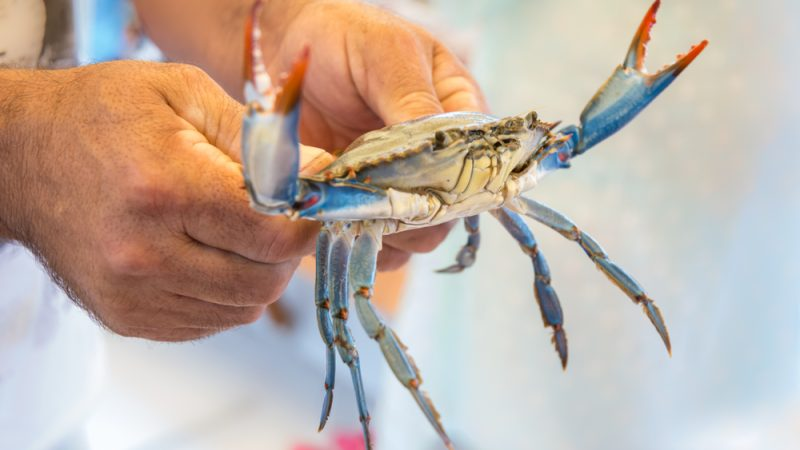


In [12]:
catalogue_dao.access(Vernacular = 'Blue crab')

[{'AphiaID': 107379,
  'url': 'https://www.marinespecies.org/aphia.php?p=taxdetails&id=107379',
  'scientificname': 'Callinectes sapidus',
  'authority': 'Rathbun, 1896',
  'status': 'accepted',
  'unacceptreason': None,
  'taxonRankID': 220,
  'rank': 'Species',
  'valid_AphiaID': 107379,
  'valid_name': 'Callinectes sapidus',
  'valid_authority': 'Rathbun, 1896',
  'parentNameUsageID': 106921,
  'kingdom': 'Animalia',
  'phylum': 'Arthropoda',
  'class': 'Malacostraca',
  'order': 'Decapoda',
  'family': 'Portunidae',
  'genus': 'Callinectes',
  'citation': 'DecaNet eds. (2025). DecaNet. Callinectes sapidus Rathbun, 1896. Accessed through: World Register of Marine Species at: https://www.marinespecies.org/aphia.php?p=taxdetails&id=107379 on 2025-10-09',
  'lsid': 'urn:lsid:marinespecies.org:taxname:107379',
  'isMarine': 1,
  'isBrackish': 1,
  'isFreshwater': 1,
  'isTerrestrial': 0,
  'isExtinct': 0,
  'match_type': 'exact',
  'modified': '2024-01-12T09:59:10.030Z'}]

Not bad...

We got ourselves the server response parsed into a Python dictionary, hence we can consume it with no need for further parsing. The envrihub library always tries to parse service outputs into well known datastructures such as dictionaries or dataframes.


## File access
But how about files? Well, both `Distribution` and its `dao` attribute work the same way.

In [13]:
res = hub.fetch_from_catalogue('file:///software/notebook/1107/Dataset/001/argo78/Distribution/001')
dao = res.dao

The only notable difference is the access method will produce a bytes string (the binary representation of the file)

In [14]:
dao.access()

b'{\n "cells": [\n  {\n   "cell_type": "markdown",\n   "id": "6ac99126",\n   "metadata": {},\n   "source": [\n    "# Argo Data Access\\n",\n    "\\n",\n    "In this notebook we show how to invoke a simple argo data access service hosted by [Euro-Argo ERIC](https://euro-argo.eu).\\n",\n    "This has been complemented in April 2025 with the interfacing to the Nerc Vocabulary Server for a seamless interrogation from the [EXV](https://vocab.nerc.ac.uk/collection/EXV/current/) vocabulary, through a sparql query (see section V).\\n",\n    "2025/05/13 edit: Further fine-tuning are required to make sure all parameters are correctly matched-up, and Argopy well linked.\\n",\n    "\\n",\n    "## I - Setting up the environment\\n",\n    "\\n",\n    "Argo access services do not use any credentials or authentification. Thus, nothing more is necessary.\\n",\n    "\\n",\n    "## II - Installing dependencies\\n",\n    "\\n",\n    "To use this data access service, you need to install [ArgoPy python libr

This can be a great deal for hacky IT people who detest to save files to their hard drive and would like to process everything in-memory, but we reckon there still might be some pathetic carbon based life forms among you, so *downloadable* resources come with a `download` method too that stores the file somewhere in your hard drive.

In [15]:
import os # this is just to have the correct slash in the path below

dao.download('data' + os.sep + 'research booty.ipynb')

And that covers the *regular* usage of the package.
# Superuberduper advanced features
At the beginning we mentioned the possibility of doing *questionable stuff* with the package, so let's talk about it.
## Non integrated servies client from OpenAPI specification
You don't need a Catalogue record to build a Data Access Object! 
That's because we know *not everything* can be shoved into the catalogue: for as much integration work the EPOS people can do, there we *always* be some nasty new (or old) stuff that just won't fit becasue no-one in the developers' pit saw it coming.
For instance, the Catalogue right now does not support Web Services with *POST* methods, but if you manage to get their OpenAPI specification, the *envrihub* library can build a client for them!

In [16]:
import os
import pandas as pd
from io import BytesIO, StringIO
from envrihub.data_access.open_api_client import build_web_service_client

We took a trip to AnaEE's catalogue and downloaded the OpenAPI specification of one of their services. From that we can build a client with almost zero effort.

In [17]:
base_url = 'https://api.anaee.eu/crea-aa-dailymeteo'
specification_file_path = 'data' + os.sep + 'anaeeweather.json'

anaee_weather = build_web_service_client(specification_file_path)()

Look at it: it has the same interface of the `dao` objects we created from the catalogue!
It means it's interoperable with them!

In [18]:
help(anaee_weather)

Help on CREAAAItalianhistoricalweatherseries in module abc object:

class CREAAAItalianhistoricalweatherseries(envrihub.data_access.models.OpenAPI3DataAccess)
 |  CREAAAItalianhistoricalweatherseries(**kwargs)
 |
 |  Method resolution order:
 |      CREAAAItalianhistoricalweatherseries
 |      envrihub.data_access.models.OpenAPI3DataAccess
 |      envrihub.data_access.models.RESTfulAPIDataAccess
 |      envrihub.data_access.models.DataAccessObject
 |      ABC
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  getNearestRasterData = caller_function(
 |      self,
 |      /,
 |      *,
 |      startTime=None,
 |      endTime=None,
 |      limit=None,
 |      country=None,
 |      group=None,
 |      stations=None,
 |      wkt=None,
 |      timezone=None,
 |      timeStep=None,
 |      mode=None,
 |      Content_Type='application/json',
 |      data=None,
 |      files=None,
 |      additional_headers: dict = None
 |  ) from envrihub.data_access.open_api_client.build_caller_funct

In [19]:
polygon_string = "POLYGON((10.15905865446625 43.58782080564057,10.20849713102875 44.29581102576821,9.23071392790375 44.73060761735282,7.709107482591251 44.45678937969159,7.385010802903751 43.72294797699299,10.15905865446625 43.58782080564057))"

service_response = anaee_weather.getStationData(wkt=polygon_string, timeStep='hour', 
                             startTime='2022-06-14', endTime='2022-06-20', 
                             additional_headers={'Ocp-Apim-Subscription-Key': os.environ['ANAEE_API_KEY']})

pd.read_csv(StringIO(service_response))

,date,seriesID,averageTemp,maxTemp,minTemp,windSpeed,maxWindSpeed,windGust,precipitation,stationPressure,...,RHMin,RHMax,RAD,leafWetness,idGroup,idCode,stationName,country,elevation,geography
0,2022-06-14 00:00:00+02:00,11,19.7,20.3,19.2,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,regione-liguria,CERPG,Passo Ghimbegna,IT,931.0,POINT (7.7332800000000006 43.90463)
1,2022-06-14 01:00:00+02:00,11,19.5,19.9,19.2,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,regione-liguria,CERPG,Passo Ghimbegna,IT,931.0,POINT (7.7332800000000006 43.90463)
2,2022-06-14 02:00:00+02:00,11,19.9,20.4,18.9,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,regione-liguria,CERPG,Passo Ghimbegna,IT,931.0,POINT (7.7332800000000006 43.90463)
3,2022-06-14 03:00:00+02:00,11,19.9,20.5,19.4,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,regione-liguria,CERPG,Passo Ghimbegna,IT,931.0,POINT (7.7332800000000006 43.90463)
4,2022-06-14 04:00:00+02:00,11,20.5,21.0,19.5,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,regione-liguria,CERPG,Passo Ghimbegna,IT,931.0,POINT (7.7332800000000006 43.90463)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22723,2022-06-19 20:00:00+02:00,11,28.5,28.7,28.2,6.0,NaN,18.0,0.0,NaN,...,27.0,42.0,0.3744,NaN,regione-liguria,DCAVV,Diano Castello - Varcavello,IT,56.0,POINT (8.06759 43.91977)
22724,2022-06-19 21:00:00+02:00,11,27.1,28.3,25.2,7.0,NaN,24.0,0.0,NaN,...,30.0,38.0,0.1440,NaN,regione-liguria,DCAVV,Diano Castello - Varcavello,IT,56.0,POINT (8.06759 43.91977)
22725,2022-06-19 22:00:00+02:00,11,24.4,25.2,23.8,12.0,NaN,26.0,0.0,NaN,...,33.0,38.0,0.0288,NaN,regione-liguria,DCAVV,Diano Castello - Varcavello,IT,56.0,POINT (8.06759 43.91977)
22726,2022-06-19 23:00:00+02:00,11,23.3,23.8,22.9,15.0,NaN,29.0,0.0,NaN,...,35.0,39.0,0.0180,NaN,regione-liguria,DCAVV,Diano Castello - Varcavello,IT,56.0,POINT (8.06759 43.91977)


That's a nice load of data! And we got it with minimal coding!

Check the [AnaEE notebook](./1.%20AnaEE%20Weather%20Data%20Access%20APIs.ipynb) for comparison, we saved ourselves quite some access logic.

## Vertical clients
The *envrihub* library comes with *vertical clients*, i.e. specific clients for specific data providers, too. You'll find them into the *data_access* sub-package. Let's check out the ARGO vertical client.

In [20]:
from envrihub.data_access.argo import ArgoDAO

argo = ArgoDAO(src = 'erddap')

Let's replicate the query demonstrated in [the Argo notebook](./2._Argo_Data_Access.ipynb)

In [21]:
lon_west,lon_east=7,15
lat_south,lat_north=42,45
depth_min,depth_max=0,2000

argo.access(lon_west=lon_west, lon_east = lon_east,
            lat_south = lat_south, lat_north = lat_north,
            depth_min = depth_min,  depth_max = depth_max,
            date_min = '2023-05-01',date_max = '2023-08-01',
            out_format = 'xarray')
            

<xarray.Dataset> Size: 7MB
Dimensions:          (N_POINTS: 58782)
Coordinates:
  * N_POINTS         (N_POINTS) int64 470kB 0 1 2 3 ... 58778 58779 58780 58781
    LATITUDE         (N_POINTS) float64 470kB 42.94 42.94 42.94 ... 43.24 43.24
    LONGITUDE        (N_POINTS) float64 470kB 7.124 7.124 7.124 ... 7.467 7.467
    TIME             (N_POINTS) datetime64[ns] 470kB 2023-05-01T07:35:20 ... ...
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int64 470kB 229 229 229 229 ... 247 247 247 247
    DATA_MODE        (N_POINTS) <U1 235kB 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION        (N_POINTS) <U1 235kB 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 470kB 6903780 6903780 ... 6903780 6903780
    POSITION_QC      (N_POINTS) int64 470kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 235kB 5.9 7.4 ... 1.963e+03 1.988e+03
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 235kB 0.01 0.01 0.01 ... nan nan nan
    PSAL_QC          (N_POINTS) int64 470kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 235kB 15.97 15.65 15.18 ... 13.22 13.23
    TEMP_ERROR       (N_POINTS) float32 235kB 0.002 0.002 0.002 ... nan nan nan
    TEMP_QC          (N_POINTS) int64 470kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 470kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           Dario
    Fetched_date:         2025/10/09
    Fetched_constraints:  [x=7.00/15.00; y=42.00/45.00; z=0.0/2000.0; t=2023-...
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

Again we saved ourselves a few lines of code, and on top of that, the ARGO client here has a consistent interface with the rest of the data access clients, as it provides an *access* function working as kitchen sink, and then additional methods to provide a more explicit access to the Argo sub-services `float` and `region`.

In [22]:
help(argo)

Help on ArgoDAO in module envrihub.data_access.argo object:

class ArgoDAO(envrihub.data_access.models.DataAccessObject)
 |  ArgoDAO(src, ds='phy', mode='standard')
 |
 |  Method resolution order:
 |      ArgoDAO
 |      envrihub.data_access.models.DataAccessObject
 |      abc.ABC
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, src, ds='phy', mode='standard')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  access(self, method='region', **kwargs)
 |      Access pethod to the Argo web services
 |
 |      Parameters
 |      ----------
 |      method:str, default:'region'
 |          The Argopy method you want to use to access your data. It can be either
 |          'region', 'float', or 'profile'. Check out Argo's documentation for more
 |          information https://argopy.readthedocs.io/en/latest/api.html#id3
 |
 |      out_format:str, default:'xarray'
 |          the output format you want to be returned, it can be either 'xarra

And that's all for now.